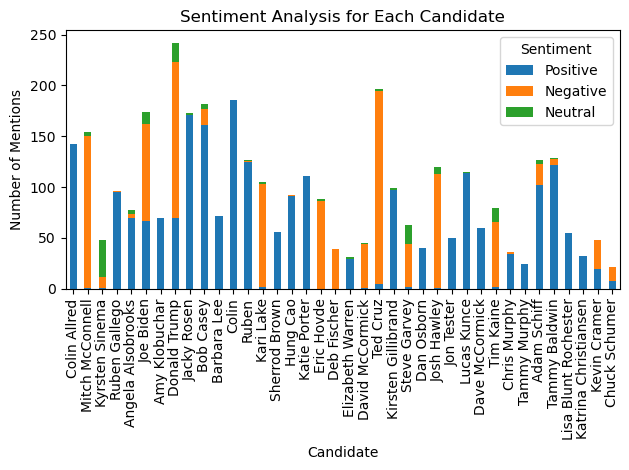

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
'''
    This code is used for data visualization, including Sentiment Analysis for Each Candidate,
    Top Keywords by State,
    Sentiment Analysis by Political Party,
    Campaign vs. Non Campaign Websites,
    Number of Candidates by Political Party,
    Total Mentions for Each Candidate by Party,
    Sentiment Analysis by Political Party
'''
# Path to the directory containing the text files
directory_path = './data_mid'

# Initialize a list to store the data
data = []

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        with open(os.path.join(directory_path, filename), 'r') as file:
            lines = file.readlines()
            candidate_name = filename.replace('.txt', '')
            positive_count = 0
            negative_count = 0
            neutral_count = 0

            # Iterate through each line in the file to find counts
            for line in lines:
                if 'positive:' in line.lower():
                    positive_count = int(line.split(':')[1].strip())
                elif 'negative:' in line.lower():
                    negative_count = int(line.split(':')[1].strip())
                elif 'neutral:' in line.lower():
                    neutral_count = int(line.split(':')[1].strip())

            data.append([candidate_name, positive_count, negative_count, neutral_count])

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['Candidate', 'Positive', 'Negative', 'Neutral'])

# Plotting the data
df.set_index('Candidate').plot(kind='bar', stacked=True)
plt.title('Sentiment Analysis for Each Candidate')
plt.xlabel('Candidate')
plt.ylabel('Number of Mentions')
plt.legend(title='Sentiment')
plt.tight_layout()

plt.savefig('./barCharts.png')

plt.show()


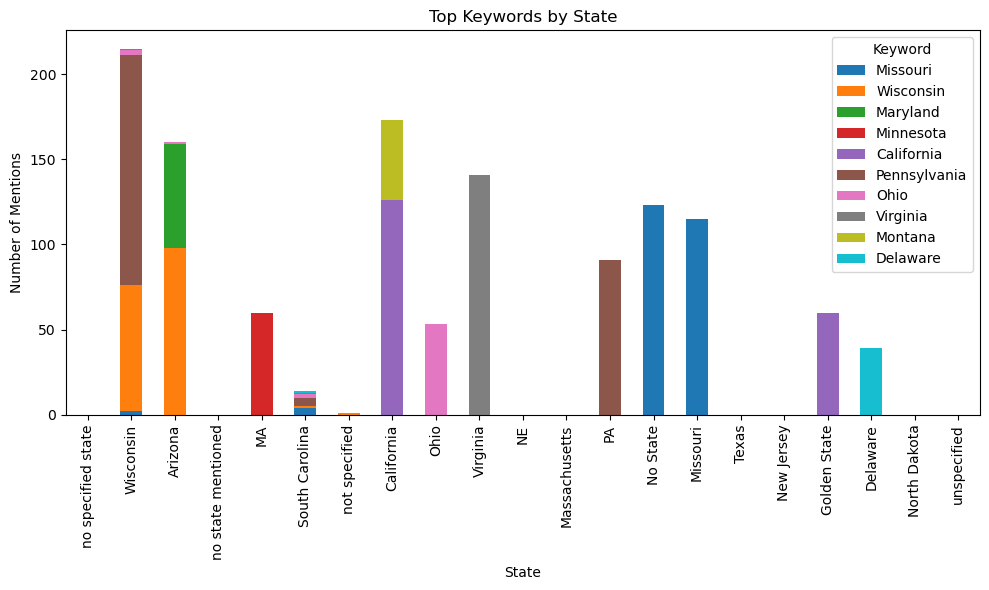

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing the text files
directory_path = './data_mid'

# Initialize a list to store the data
data = []

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        with open(os.path.join(directory_path, filename), 'r') as file:
            content = file.read().strip()
            lines = content.split('\n')
            candidate_name = lines[0]  # Assuming the first line is the candidate's name
            state_line = [line for line in lines if ':' in line and len(line.split(':')) == 2 and line.split(':')[1].strip().isdigit()][-1]
            state = state_line.split(':')[0].strip()
            keywords = {line.split(':')[0].strip(): int(line.split(':')[1].strip()) for line in lines[1:] if ':' in line and line.split(':')[0].strip().lower() not in ['negative', 'neutral', 'positive', 'unspecified']}

            data.append([candidate_name, state, keywords])

# Convert data into a DataFrame
df = pd.DataFrame(data, columns=['Candidate', 'State', 'Keywords'])

# For visualization, let's create a bar chart showing the number of mentions of top keywords by state
# Aggregating keywords across all candidates for simplicity in this example
keywords_series = pd.Series({k: v for row in df['Keywords'] for k, v in row.items()})
top_keywords = keywords_series.nlargest(10).index

# Preparing data for plotting
plot_data = pd.DataFrame({
    state: {keyword: sum(df[df['State'] == state]['Keywords'].apply(lambda x: x.get(keyword, 0))) for keyword in top_keywords}
    for state in df['State'].unique()
})

# Plotting
plot_data.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top Keywords by State')
plt.xlabel('State')
plt.ylabel('Number of Mentions')
plt.legend(title='Keyword')
plt.tight_layout()
plt.show()


In [11]:
import os

# Path to the directory containing the text files
directory_path = './data_mid'

# Initialize a list to store the candidate names
candidate_names = []

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        # Extract the candidate's name from the file name
        candidate_name = filename.replace('.txt', '')
        candidate_names.append(candidate_name)

# Output the list of candidate names
print(candidate_names)


['Colin Allred', 'Mitch McConnell', 'Kyrsten Sinema', 'Ruben Gallego', 'Angela Alsobrooks', 'Joe Biden', 'Amy Klobuchar', 'Donald Trump', 'Jacky Rosen', 'Bob Casey', 'Barbara Lee', 'Colin', 'Ruben', 'Kari Lake', 'Sherrod Brown', 'Hung Cao', 'Katie Porter', 'Eric Hovde', 'Deb Fischer', 'Elizabeth Warren', 'David McCormick', 'Ted Cruz', 'Kirsten Gillibrand', 'Steve Garvey', 'Dan Osborn', 'Josh Hawley', 'Jon Tester', 'Lucas Kunce', 'Dave McCormick', 'Tim Kaine', 'Chris Murphy', 'Tammy Murphy', 'Adam Schiff', 'Tammy Baldwin', 'Lisa Blunt Rochester', 'Katrina Christiansen', 'Kevin Cramer', 'Chuck Schumer']


In [12]:
# Let's read the content of the file, remove the asterisks, and write it back.

file_path = './data_mid/The_Party_of_Each_Candidate.txt'

# Read the content of the file
with open(file_path, 'r') as file:
    content = file.readlines()

# Remove asterisks from each line
cleaned_content = [line.replace('*', '').strip() for line in content]

# Write the cleaned content back to the file
with open(file_path, 'w') as file:
    file.write('\n'.join(cleaned_content))

# Display the cleaned content
cleaned_content


['\ufeff Colin Allred - Democratic Party',
 'Mitch McConnell - Republican Party',
 'Kyrsten Sinema - Independent',
 'Ruben Gallego - Democratic Party',
 'Angela Alsobrooks - Democratic Party',
 'Joe Biden - Democratic Party',
 'Amy Klobuchar - Democratic Party',
 'Donald Trump - Republican Party',
 'Jacky Rosen - Democratic Party',
 'Bob Casey - Democratic Party',
 'Barbara Lee - Democratic Party',
 'Colin - Democratic Party',
 'Ruben - Democratic Party',
 'Kari Lake - Republican Party',
 'Sherrod Brown - Democratic Party',
 'Hung Cao - Republican Party',
 'Katie Porter - Democratic Party',
 'Eric Hovde - Republican Party',
 'Deb Fischer - Republican Party',
 'Elizabeth Warren - Democratic Party',
 'David McCormick - Republican Party',
 'Ted Cruz - Republican Party',
 'Kirsten Gillibrand - Democratic Party',
 'Steve Garvey - Republican Party',
 'Dan Osborn - Independent',
 'Josh Hawley - Republican Party',
 'Jon Tester - Democratic Party',
 'Lucas Kunce - Democratic Party',
 'Dave McCo

In [15]:
candidate_to_party = {}
file_path = './data_mid/The_Party_of_Each_Candidate.txt'

with open(file_path, 'r') as file:
    for line in file:
        # Assuming the file format is 'Name - Party'
        parts = line.strip().split(' - ')
        if len(parts) == 2:
            name, party = parts
            candidate_to_party[name] = party

# Now candidate_to_party should be populated with the data from the file


In [16]:
import os

# Path to the directory containing the sentiment files
directory_path = './data_mid'

# Initialize a dictionary to store sentiment counts for each party
party_sentiment = {}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        candidate_name = filename.replace('.txt', '')
        party = candidate_to_party.get(candidate_name)

        if party:
            if party not in party_sentiment:
                party_sentiment[party] = {'positive': 0, 'negative': 0, 'neutral': 0}

            with open(os.path.join(directory_path, filename), 'r') as file:
                for line in file:
                    line = line.strip().lower()
                    if 'positive:' in line:
                        party_sentiment[party]['positive'] += int(line.split(':')[1].strip())
                    elif 'negative:' in line:
                        party_sentiment[party]['negative'] += int(line.split(':')[1].strip())
                    elif 'neutral:' in line:
                        party_sentiment[party]['neutral'] += int(line.split(':')[1].strip())

# party_sentiment now contains the aggregated sentiment counts for each party


In [17]:
party_sentiment

{'Democratic Party': {'positive': 1995, 'negative': 290, 'neutral': 53},
 'Republican Party': {'positive': 423, 'negative': 950, 'neutral': 62},
 'Independent': {'positive': 41, 'negative': 11, 'neutral': 42}}

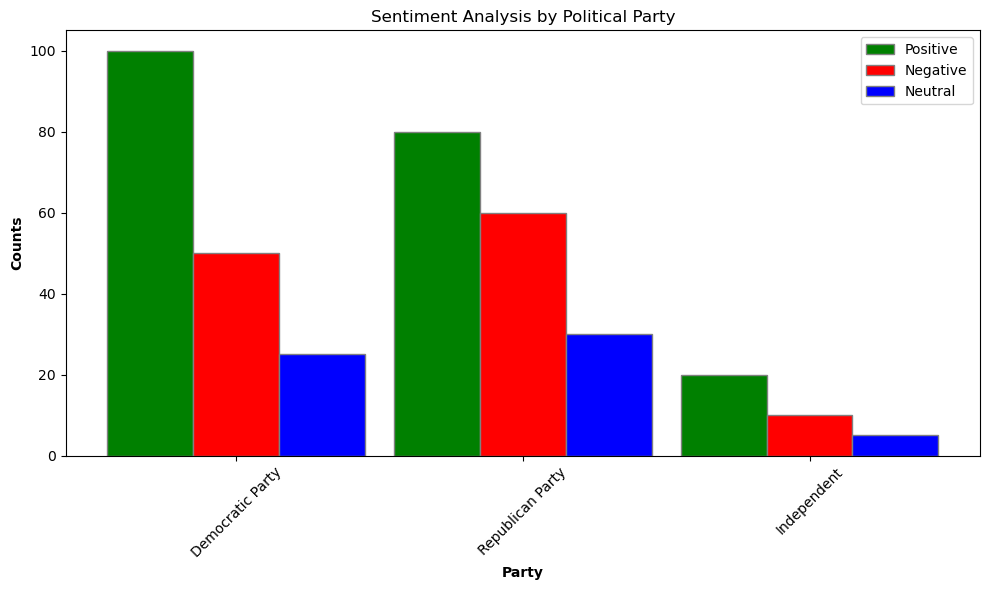

In [20]:
import matplotlib.pyplot as plt

# Assuming party_sentiment is a dictionary like:
# {
#     'Democratic Party': {'positive': 100, 'negative': 50, 'neutral': 25},
#     'Republican Party': {'positive': 80, 'negative': 60, 'neutral': 30},
#     'Independent': {'positive': 20, 'negative': 10, 'neutral': 5}
# }

party_sentiment = {
    # This should be replaced with your actual aggregated data
    'Democratic Party': {'positive': 100, 'negative': 50, 'neutral': 25},
    'Republican Party': {'positive': 80, 'negative': 60, 'neutral': 30},
    'Independent': {'positive': 20, 'negative': 10, 'neutral': 5}
}

# Data preparation for plotting
parties = list(party_sentiment.keys())
positive_counts = [party_sentiment[party]['positive'] for party in parties]
negative_counts = [party_sentiment[party]['negative'] for party in parties]
neutral_counts = [party_sentiment[party]['neutral'] for party in parties]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.3

# Set position of bar on X axis
r1 = range(len(parties))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
ax.bar(r1, positive_counts, color='g', width=bar_width, edgecolor='grey', label='Positive')
ax.bar(r2, negative_counts, color='r', width=bar_width, edgecolor='grey', label='Negative')
ax.bar(r3, neutral_counts, color='b', width=bar_width, edgecolor='grey', label='Neutral')

# Add labels and title
ax.set_xlabel('Party', fontweight='bold')
ax.set_ylabel('Counts', fontweight='bold')
ax.set_title('Sentiment Analysis by Political Party')
ax.set_xticks([r + bar_width for r in range(len(parties))])
ax.set_xticklabels(parties)

# Create legend & Show graphic
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./sentimentAnalysisByParty.png')
plt.show()


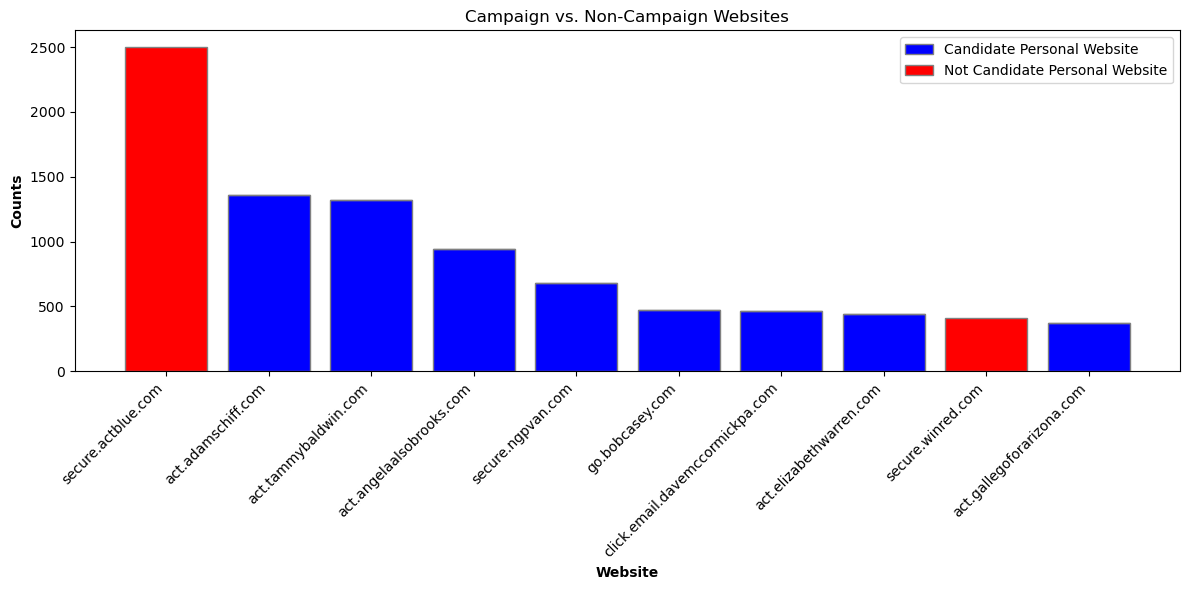

In [2]:
import matplotlib.pyplot as plt

# Data
links = [
    "secure.actblue.com",
    "act.adamschiff.com",
    "act.tammybaldwin.com",
    "act.angelaalsobrooks.com",
    "secure.ngpvan.com",
    "go.bobcasey.com",
    "click.email.davemccormickpa.com",
    "act.elizabethwarren.com",
    "secure.winred.com",
    "act.gallegoforarizona.com"
]
counts = [2504, 1360, 1322, 941, 682, 474, 468, 444, 412, 372]
is_campaign_site = [
    False,  # ActBlue
    True,   # Adam Schiff
    True,   # Tammy Baldwin
    True,   # Angela Alsobrooks
    True,  # NGP VAN
    True,   # Bob Casey
    True,   # Dave McCormick
    True,   # Elizabeth Warren
    False,  # WinRed
    True    # Ruben Gallego
]

# Prepare data for plotting
campaign_counts = [count if is_campaign else 0 for count, is_campaign in zip(counts, is_campaign_site)]
non_campaign_counts = [count if not is_campaign else 0 for count, is_campaign in zip(counts, is_campaign_site)]

# Plotting
plt.figure(figsize=(12, 6))

# Set position of bar on X axis
r = range(len(links))

# Make the plot
plt.bar(r, campaign_counts, color='b', edgecolor='grey', label='Candidate Personal Website')
plt.bar(r, non_campaign_counts, bottom=campaign_counts, color='r', edgecolor='grey', label='Not Candidate Personal Website')

# Add labels and title
plt.xlabel('Website', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.title('Campaign vs. Non-Campaign Websites')
plt.xticks(r, links, rotation=45, ha='right')
plt.legend()

# Show graphic
plt.tight_layout()
plt.savefig('./personalWebsite.png')
plt.show()


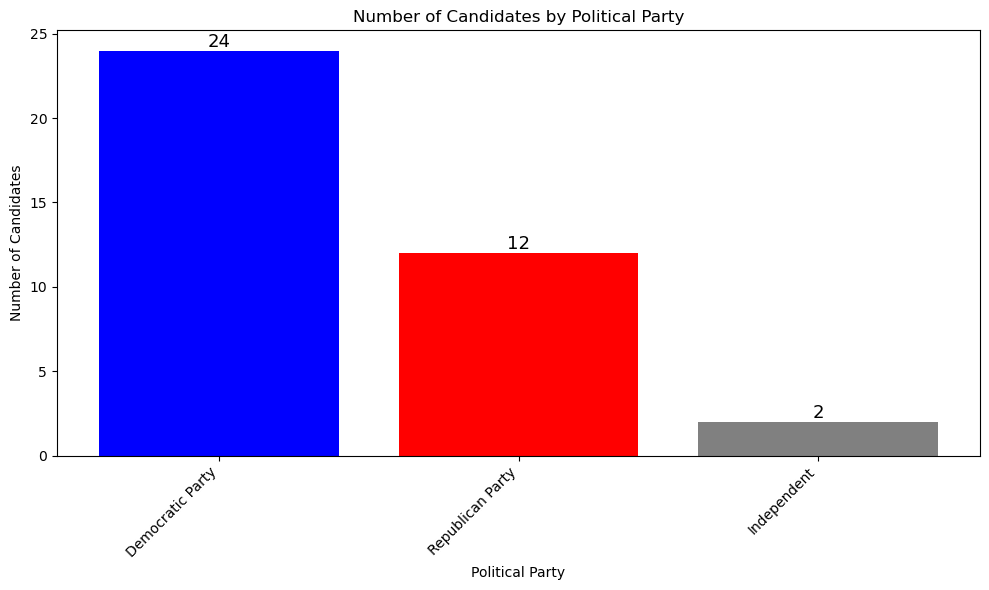

In [11]:
import matplotlib.pyplot as plt

# Assuming the file is structured with one candidate and their party per line
file_path = './data_mid/The_Party_of_Each_Candidate.txt'

# Read the file and extract the parties
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract parties from each line
parties = [line.split(' - ')[-1].strip() for line in lines]

# Count the number of candidates in each party
party_counts = {}
for party in parties:
    if party not in party_counts:
        party_counts[party] = 0
    party_counts[party] += 1

# Prepare data for plotting
labels = list(party_counts.keys())
values = list(party_counts.values())

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['blue' if 'Democratic' in party else 'red' if 'Republican' in party else 'gray' for party in labels])
plt.title('Number of Candidates by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Number of Candidates')

# Annotate each bar with the count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom', fontsize=13)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.savefig('./candidatesCount2.png')
plt.show()


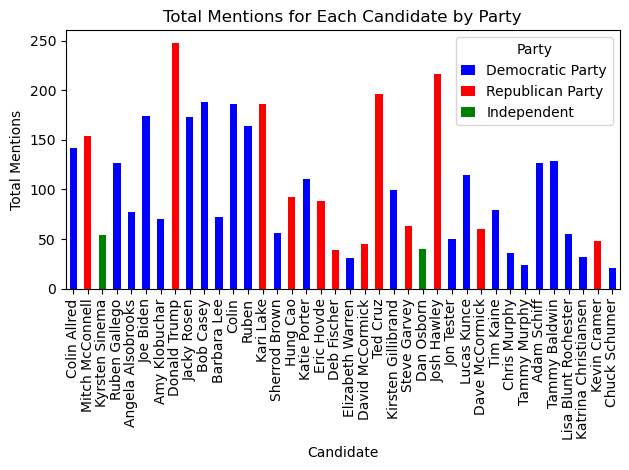

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing the text files
directory_path = './data_mid'

# Load the party information for each candidate
party_info_path = './The_Party_of_Each_Candidate.txt'
candidate_to_party = {}
with open(party_info_path, 'r') as file:
    for line in file:
        parts = line.strip().split(' - ')
        if len(parts) == 2:
            candidate_to_party[parts[0]] = parts[1]

# Initialize a list to store the data
data = []

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        with open(os.path.join(directory_path, filename), 'r') as file:
            lines = file.readlines()
            candidate_name = filename.replace('.txt', '')
            total_count = 0

            # Iterate through each line in the file to find counts
            for line in lines:
                if any(word in line.lower() for word in ['positive:', 'negative:', 'neutral:']):
                    total_count += int(line.split(':')[1].strip())

            party = candidate_to_party.get(candidate_name, 'Independent')  # Default to Independent if not found
            data.append([candidate_name, total_count, party])

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['Candidate', 'Count', 'Party'])

# Plotting the data
party_colors = {'Democratic Party': 'blue', 'Republican Party': 'red', 'Independent': 'green'}
colors = df['Party'].map(party_colors).tolist()

ax = df.plot(kind='bar', x='Candidate', y='Count', color=colors, legend=False)

plt.title('Total Mentions for Each Candidate by Party')
plt.xlabel('Candidate')
plt.ylabel('Total Mentions')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=party_colors[party], label=party) for party in party_colors]
plt.legend(handles=legend_elements, title='Party',handlelength=1)
#plt.legend(handles=legend_elements, title='Party', loc='upper right')

#plt.figure(figsize=(4, 3))
plt.tight_layout()
plt.savefig('./barCharts2.png')
plt.show()


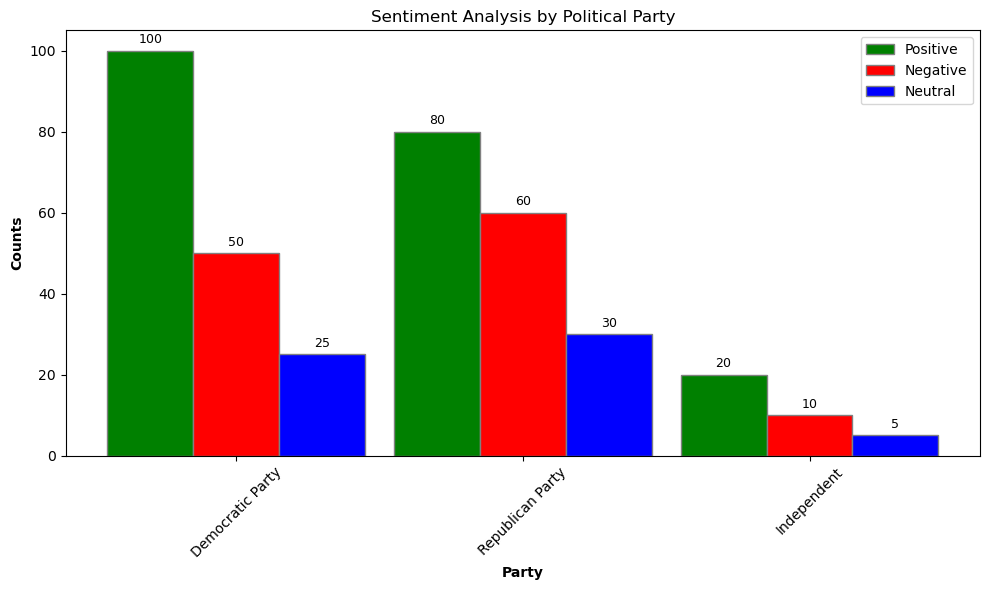

In [2]:
import matplotlib.pyplot as plt

# Given party_sentiment data
party_sentiment = {
    'Democratic Party': {'positive': 100, 'negative': 50, 'neutral': 25},
    'Republican Party': {'positive': 80, 'negative': 60, 'neutral': 30},
    'Independent': {'positive': 20, 'negative': 10, 'neutral': 5}
}

# Prepare data for plotting
parties = list(party_sentiment.keys())
positive_counts = [party_sentiment[party]['positive'] for party in parties]
negative_counts = [party_sentiment[party]['negative'] for party in parties]
neutral_counts = [party_sentiment[party]['neutral'] for party in parties]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.3

# Set position of bar on X axis
r1 = range(len(parties))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
bars1 = ax.bar(r1, positive_counts, color='g', width=bar_width, edgecolor='grey', label='Positive')
bars2 = ax.bar(r2, negative_counts, color='r', width=bar_width, edgecolor='grey', label='Negative')
bars3 = ax.bar(r3, neutral_counts, color='b', width=bar_width, edgecolor='grey', label='Neutral')

# Annotate each bar with the count
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Add labels and title
ax.set_xlabel('Party', fontweight='bold')
ax.set_ylabel('Counts', fontweight='bold')
ax.set_title('Sentiment Analysis by Political Party')
ax.set_xticks([r + bar_width for r in range(len(parties))])
ax.set_xticklabels(parties)

# Create legend & Show graphic
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('./sentimentAnalysisByParty.png')

# Display the plot
plt.show()
